In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential
from keras.models import load_model
from keras.utils.vis_utils import plot_model

from PIL import Image

from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

In [2]:
class CONFIG:
    INDEXS = ["R2", "EV", "ME", "MEAN_AE", "MSE", "MEDIAN_AE"]
    N_SPLITS = 5

# Load Dataset

In [3]:
header = pd.read_csv("Dataset/header.csv", header=None)
header

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday-Friday,Post published weekday-Saturday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday,Target Variable


In [4]:
training_dataset = pd.read_csv("Dataset/Training/Features_Variant_1.csv",
                               header=None,
                               names=[header.iat[0, i] for i in range(0, 54)])
training_dataset.sample(n=10)

,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday-Friday,Post published weekday-Saturday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday,Target Variable
21652,1154,0,1,91,0.0,15.0,2.804348,2.0,3.779922,0.0,...,1,0,0,0,0,0,0,0,1,1
22067,888531,1,4469,47,0.0,258.0,93.044118,88.0,41.825419,0.0,...,0,0,0,1,0,0,0,0,0,20
39524,273093,0,17964,38,0.0,586.0,50.000000,27.0,82.706811,0.0,...,1,0,0,0,0,0,0,0,1,0
16158,3150,0,5,80,0.0,40.0,2.758065,0.0,6.171437,0.0,...,0,1,1,0,0,0,0,0,0,0
20812,126533,0,6799,36,0.0,35.0,4.517241,2.0,7.351381,0.0,...,0,1,0,1,0,0,0,0,0,0
15338,12502094,1,36292,14,0.0,1255.0,177.114286,124.0,197.370298,0.0,...,0,0,0,0,0,0,0,0,1,12
11057,175201,0,54849,36,0.0,804.0,123.616034,85.0,124.440148,0.0,...,0,0,0,0,0,1,0,0,0,7
3591,81756,0,2947,36,0.0,182.0,20.431694,12.0,26.890681,0.0,...,0,0,0,0,0,0,0,1,0,1
33214,10039,4,1151,56,0.0,76.0,3.816092,1.0,8.825940,0.0,...,0,0,0,0,1,0,0,0,0,0
30907,518876,0,51411,24,0.0,299.0,64.776471,46.0,64.256357,0.0,...,0,0,0,0,0,0,0,1,0,1


In [5]:
features = training_dataset.iloc[:, :53]
features

,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday-Thursday,Post published weekday-Friday,Post published weekday-Saturday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,0,0,1
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1,0,0,0,0,0,0,0,1,0
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,1,0,0,0,0,0,0,0,1
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,1,0,0,1,0,0,0,0,0
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,...,0,0,0,0,0,0,0,0,1,0
40945,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,...,0,0,0,0,0,0,0,0,1,0
40946,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,...,0,0,0,0,0,0,0,1,0,0
40947,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
labels = training_dataset.iloc[:, -1:]
labels

,Target Variable
0,0
1,0
2,0
3,0
4,0
...,...
40944,1
40945,2
40946,72
40947,28


In [7]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=.3, random_state=42)

# Fully Connected Neural Network

## Normalization

In [8]:
def normalize(X_train, X_test, y_train, y_test):
    x_scaler = StandardScaler()
    x_scaler.fit(X_train)
    X_train_norm = x_scaler.transform(X_train)
    X_test_norm = x_scaler.transform(X_test)
    y_scaler = StandardScaler()
    y_scaler.fit(y_train)
    y_train_norm = y_scaler.transform(y_train)
    y_test_norm = y_scaler.transform(y_test)
    return X_train_norm, X_test_norm, y_train_norm, y_test_norm

## Model Initialization

In [9]:
def create_model():
    # Sequential
    model = Sequential()
    model.add(Dense(units=53,
                    activation='relu',
                    input_shape=(53,)))
    model.add(Dropout(0.2))
    model.add(Dense(units=1, activation='linear'))
    model.compile(loss='mse', optimizer='adam')
    print(model.summary())
    return model

## Model Training

In [10]:
def train_model(model, X_train_norm, y_train_norm, X_test_norm, y_test_norm):
    train = model.fit(X_train_norm,
                      y_train_norm,
                      epochs=300,
                      batch_size=512,
                      verbose=1,
                      validation_data=(X_test_norm, y_test_norm))
    model.save('model_fcnn.h5')
    predict = model.predict(X_test_norm)
    plt.plot(train.history['loss'])  
    plt.plot(train.history['val_loss'])  
    plt.title('Model loss')  
    plt.ylabel('Loss')  
    plt.xlabel('Epoch')  
    plt.legend(['Train', 'Test'], loc='upper left')  
    plt.show()
    plt.figure(figsize=(10, 15))
    plot_model(model, to_file='model_fcnn.png', show_shapes=True)
    img = Image.open('model_fcnn.png', 'r')
    plt.imshow(np.asarray(img))
    plt.show()
    return predict

In [11]:
def plot_test_predict(y_train, y_test_norm, predict, axes=None, k=None):
    y_scaler = StandardScaler()
    y_scaler.fit(y_train)
    test_predict = pd.concat(
        [pd.DataFrame(y_scaler.inverse_transform(y_test_norm)),
         pd.DataFrame(y_scaler.inverse_transform(predict.reshape(-1, 1)))
    ], axis=1)
    headers =  ["Test", "Predict"]
    test_predict.columns = headers
    if axes is not None and k is not None:
        sns.lineplot(data=test_predict.sample(n=50), ax=axes[k]).set_title("Test Predict Curve k = " + str(k))
    else:
        sns.lineplot(data=test_predict.sample(n=50)).set_title("Test Predict Curve")
    plt.show()
    sns.residplot(x=y_scaler.inverse_transform(y_test_norm), 
                  y=y_scaler.inverse_transform(predict.reshape(-1, 1)), lowess=True).set_title("Residuals")
    plt.show()

## Model Evaluation

In [12]:
def evaluate(model, y_train, X_test_norm, y_test_norm, predict):
    y_scaler = StandardScaler()
    y_scaler.fit(y_train)
    
    # R-Squared
    r2 = r2_score(y_scaler.inverse_transform(y_test_norm),
                  y_scaler.inverse_transform(predict.reshape(-1, 1)))
    
    # Explained Variance Score
    ev = explained_variance_score(y_scaler.inverse_transform(y_test_norm),
                                  y_scaler.inverse_transform(predict.reshape(-1, 1)))
    
    # Max Error
    me = max_error(y_scaler.inverse_transform(y_test_norm), 
                   y_scaler.inverse_transform(predict.reshape(-1, 1)))
    
    # Mean Absolute Error
    mean_ae = mean_absolute_error(y_scaler.inverse_transform(y_test_norm),
                                  y_scaler.inverse_transform(predict.reshape(-1, 1)))
    
    # Mean Squared Error
    mse = mean_squared_error(y_scaler.inverse_transform(y_test_norm),
                             y_scaler.inverse_transform(predict.reshape(-1, 1)))
    
    # Median Absolute Error
    median_ae = median_absolute_error(y_scaler.inverse_transform(y_test_norm), 
                                      y_scaler.inverse_transform(predict.reshape(-1, 1)))
    
    return r2, ev, me, mean_ae, mse, median_ae

## Final Model

In [13]:
def train_final_model():
    # Normalization
    X_train_norm, X_test_norm, y_train_norm, y_test_norm = normalize(X_train, X_test, y_train, y_test)

    # Model Initialization
    model = create_model()

    # Model Training
    predict = train_model(model, X_train_norm, y_train_norm, X_test_norm, y_test_norm)
    plot_test_predict(y_train, y_test_norm, predict)

    # Model Evaluation
    r2, ev, me, mean_ae, mse, median_ae = evaluate(model, y_train, X_test_norm, y_test_norm, predict)

    results = pd.DataFrame({
        "Index": CONFIG.INDEXS, 
        "Mean": [r2, ev, me, mean_ae, mse, median_ae]
    })
    print(results)

2021-09-23 23:37:25.750369: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-23 23:37:25.817987: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 53)                2862      
_________________________________________________________________
dropout (Dropout)            (None, 53)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 54        
Total params: 2,916
Trainable params: 2,916
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/300
56/56 [==============================] - 1s 4ms/step - loss: 1.3142 - val_loss: 0.5528
Epoch 2/300
56/56 [==============================] - 0s 2ms/step - loss: 0.8674 - val_loss: 0.4986
Epoch 3/300
56/56 [==============================] - 0s 2ms/step - loss: 0.7978 - val_loss: 0.4806
Epoch 4/300
56/56 [==============================] - 0s 2ms/step - loss: 0.7585 - 

56/56 [==============================] - 0s 2ms/step - loss: 0.5050 - val_loss: 0.3576
Epoch 76/300
56/56 [==============================] - 0s 2ms/step - loss: 0.4994 - val_loss: 0.3595
Epoch 77/300
56/56 [==============================] - 0s 2ms/step - loss: 0.5058 - val_loss: 0.3564
Epoch 78/300
56/56 [==============================] - 0s 2ms/step - loss: 0.4956 - val_loss: 0.3534
Epoch 79/300
56/56 [==============================] - 0s 2ms/step - loss: 0.4922 - val_loss: 0.3541
Epoch 80/300
56/56 [==============================] - 0s 2ms/step - loss: 0.4919 - val_loss: 0.3638
Epoch 81/300
56/56 [==============================] - 0s 2ms/step - loss: 0.5138 - val_loss: 0.3521
Epoch 82/300
56/56 [==============================] - 0s 2ms/step - loss: 0.5040 - val_loss: 0.3513
Epoch 83/300
56/56 [==============================] - 0s 2ms/step - loss: 0.4908 - val_loss: 0.3469
Epoch 84/300
56/56 [==============================] - 0s 2ms/step - loss: 0.5065 - val_loss: 0.3497
Epoch 85/300


56/56 [==============================] - 0s 2ms/step - loss: 0.4189 - val_loss: 0.3172
Epoch 157/300
56/56 [==============================] - 0s 2ms/step - loss: 0.4187 - val_loss: 0.3194
Epoch 158/300
56/56 [==============================] - 0s 2ms/step - loss: 0.4182 - val_loss: 0.3370
Epoch 159/300
56/56 [==============================] - 0s 2ms/step - loss: 0.4442 - val_loss: 0.3111
Epoch 160/300
56/56 [==============================] - 0s 2ms/step - loss: 0.4096 - val_loss: 0.3119
Epoch 161/300
56/56 [==============================] - 0s 2ms/step - loss: 0.4142 - val_loss: 0.3156
Epoch 162/300
56/56 [==============================] - 0s 2ms/step - loss: 0.4192 - val_loss: 0.3218
Epoch 163/300
56/56 [==============================] - 0s 2ms/step - loss: 0.4031 - val_loss: 0.3125
Epoch 164/300
56/56 [==============================] - 0s 2ms/step - loss: 0.4029 - val_loss: 0.3253
Epoch 165/300
56/56 [==============================] - 0s 2ms/step - loss: 0.4267 - val_loss: 0.3387
Epoc

56/56 [==============================] - 0s 2ms/step - loss: 0.3815 - val_loss: 0.2959
Epoch 238/300
56/56 [==============================] - 0s 2ms/step - loss: 0.3710 - val_loss: 0.3212
Epoch 239/300
56/56 [==============================] - 0s 2ms/step - loss: 0.3768 - val_loss: 0.3124
Epoch 240/300
56/56 [==============================] - 0s 2ms/step - loss: 0.4001 - val_loss: 0.2987
Epoch 241/300
56/56 [==============================] - 0s 2ms/step - loss: 0.3817 - val_loss: 0.3038
Epoch 242/300
56/56 [==============================] - 0s 2ms/step - loss: 0.3708 - val_loss: 0.3041
Epoch 243/300
56/56 [==============================] - 0s 2ms/step - loss: 0.3795 - val_loss: 0.2964
Epoch 244/300
56/56 [==============================] - 0s 2ms/step - loss: 0.3787 - val_loss: 0.3009
Epoch 245/300
56/56 [==============================] - 0s 2ms/step - loss: 0.3892 - val_loss: 0.3106
Epoch 246/300
56/56 [==============================] - 0s 2ms/step - loss: 0.3718 - val_loss: 0.3319
Epoc

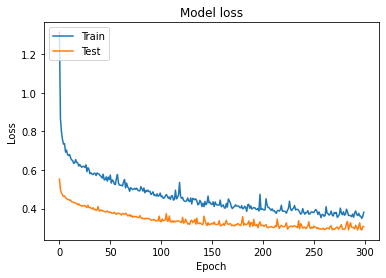

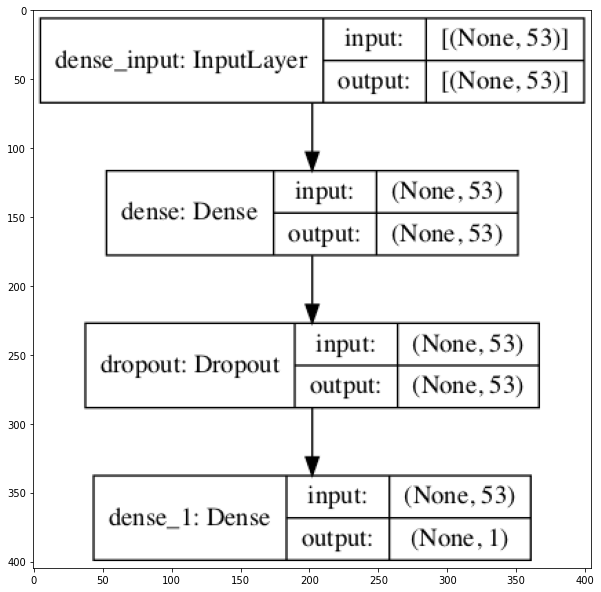

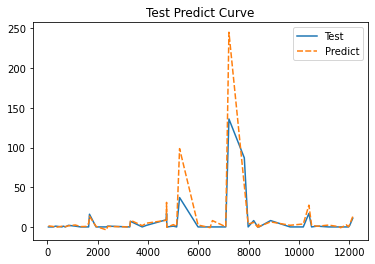

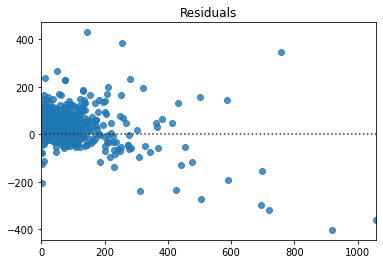

       Index        Mean
0         R2    0.587833
1         EV    0.590325
2         ME  666.868683
3    MEAN_AE    5.465773
4        MSE  418.550628
5  MEDIAN_AE    1.460328


In [14]:
train_final_model()